In [3]:
from datasets import load_dataset

In [4]:
my_dataset = load_dataset('csv', data_files='/home/ubuntu/Documentos/GitHub/MUCSI_Modal/data/captions/raw/gettyimages_bilbao.csv')

Found cached dataset csv (/home/ubuntu/.cache/huggingface/datasets/csv/default-b7feaca24646d71c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
my_dataset["train"][0]


{'img_url': 'https://media.gettyimages.com/id/1301815245/es/foto/jokin-ezkieta-of-athletic-club-warms-up-during-the-copa-del-ray-semi-final-match-between.jpg?s=612x612&w=0&k=20&c=Gl-59oMjabq44Vdhkg0w0Yh95G8m2iaAkklq8skVIkY=',
 'local_path': 'data/imgs/1682604798.468204-26804.jpg',
 'title': 'Jokin Ezkieta of Athletic Club warms up during the Copa del Ray Semi Final match between Athletic Club and Levante at Estadio de San Mames on...',
 'caption': "['BILBAO, SPAIN - FEBRUARY 11: Jokin Ezkieta of Athletic Club warms up during the Copa del Ray Semi Final match between Athletic Club and Levante at Estadio de San Mames on February 11, 2021 in Bilbao, Spain. (Photo by Juan Manuel Serrano Arce/Getty Images)']"}

In [6]:
import os
from PIL import Image

def load_image(data):
    
    with open("/home/ubuntu/Documentos/GitHub/MUCSI_Modal/"+data["local_path"], 'rb') as f:
        img = Image.open(f)

        data["image"]=img.convert('RGB')
        return data


In [7]:
my_train = my_dataset["train"]

In [8]:
my_train=my_train.map(load_image)

Loading cached processed dataset at /home/ubuntu/.cache/huggingface/datasets/csv/default-b7feaca24646d71c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1/cache-f5a96376772579ef.arrow


In [9]:
my_train

Dataset({
    features: ['img_url', 'local_path', 'title', 'caption', 'image'],
    num_rows: 4950
})

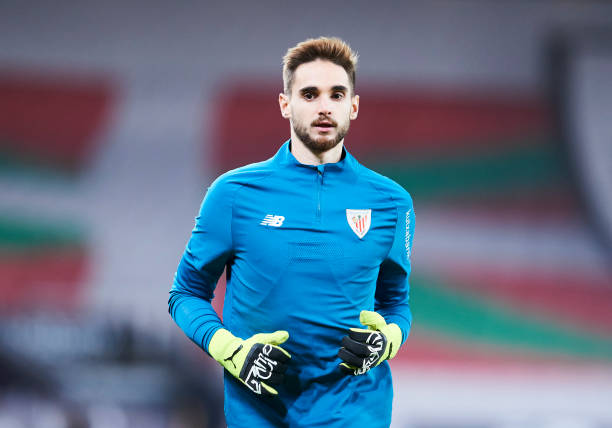

In [10]:
my_train["image"][0]

Una vez cargada las imagenes, se procedera ha realizar la limpieza de los datos. Se ha observado que muchos de los datos empieza con una descripcion que no interesa, pero solo ocurre hasta el primer :. Tambien se ha observado que hay ciertos datos que terminan con una parentesis que seria interesante eliminar. Por ultimo, hay datos que no tienen descripcion,por lo que se utilizara el titulo, cogiendo solo el texto antes del primer -.

In [11]:
my_train["caption"][289]

"['Photo taken in Bilbao, Spain']"

In [12]:
def limpieza_caption(example):
    
    if not example['caption']:
        example['caption'] = example['title'].split("-",1)[0].strip()
    partes = example['caption'].split(":",1)
    if len(partes) > 1:
        example['caption'] = partes[1]
    
    partes = example['caption'].split("(", 1)
    if len(partes) > 1:
        example['caption'] = partes[0].strip()
    
    return example

In [13]:
def limpiar_caso_especifico(example):
    example['caption']= example['caption'].replace("['", "").replace("']", "")
    return example

In [14]:
my_train = my_train.map(limpieza_caption)

Loading cached processed dataset at /home/ubuntu/.cache/huggingface/datasets/csv/default-b7feaca24646d71c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1/cache-a737a7088866f595.arrow


In [15]:
my_train = my_train.map(limpiar_caso_especifico)

Loading cached processed dataset at /home/ubuntu/.cache/huggingface/datasets/csv/default-b7feaca24646d71c/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1/cache-646f0c391d755120.arrow


Toca traducir ciertas oraciones al ingles, ya que aparecen en frances. Para ello se utilizara la API de google.

In [ ]:
import datasets
dd=my_train.train_test_split(test_size=0.2)
dd.push_to_hub("TheMrguiller/BilbaoQA")

Pushing split train to the Hub.


Map:   0%|          | 0/1320 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/3 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

In [53]:
from deep_translator import GoogleTranslator
translator=GoogleTranslator(source='auto', target='en')
def translate_data(example):
    example["caption"]=translator.translate(example["caption"])
    return example

In [ ]:
translator.translate('Photo taken in Bilbao, Spain')

In [41]:
my_train = my_train.map(translate_data)

Map:   0%|          | 0/4950 [00:00<?, ? examples/s]

KeyboardInterrupt: 

In [51]:
from pprint import pprint
import nltk
nltk.download('stopwords')
import sys
sys.path.append("/home/ubuntu/Documentos/GitHub/MUCSI_Modal/Questgen")
from Questgen import main
qe= main.BoolQGen()

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'Questgen'

In [ ]:
payload = {
            "input_text": "Sachin Ramesh Tendulkar is a former international cricketer from India and a former captain of the Indian national team. He is widely regarded as one of the greatest batsmen in the history of cricket. He is the highest run scorer of all time in International cricket."
        }
output = qe.predict_boolq(payload)
pprint (output)